## Метод ближайших соседей (Nearest Neighbors) [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html)

Метод ближайших соседей основан на вычислении расстояний между признаками на обучающей выборке (имеющей целевую переменную) и признаками новых входных данных.

Позаимствуем данные у яндекс.практикума, они не обидятся ))

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
columns = ['комнаты', 'площадь', 'кухня', 'пл. жилая', 'этаж', 'всего этажей', 'кондиционер']

df_train = pd.DataFrame([
    [1, 38.5, 6.9, 18.9, 3, 5, 1],
    [1, 38.0, 8.5, 19.2, 9, 17, 0],
    [1, 34.7, 10.3, 19.8, 1, 9, 0],
    [1, 45.9, 11.1, 17.5, 11, 23, 1],
    [1, 42.4, 10.0, 19.9, 6, 14, 0],
    [1, 46.0, 10.2, 20.5, 3, 12, 1],
    [2, 77.7, 13.2, 39.3, 3, 17, 1],
    [2, 69.8, 11.1, 31.4, 12, 23, 0],
    [2, 78.2, 19.4, 33.2, 4, 9, 0],
    [2, 55.5, 7.8, 29.6, 1, 25, 1],
    [2, 74.3, 16.0, 34.2, 14, 17, 1],
    [2, 78.3, 12.3, 42.6, 23, 23, 0],
    [2, 74.0, 18.1, 49.0, 8, 9, 0],
    [2, 91.4, 20.1, 60.4, 2, 10, 0],
    [3, 85.0, 17.8, 56.1, 14, 14, 1],
    [3, 79.8, 9.8, 44.8, 9, 10, 0],
    [3, 72.0, 10.2, 37.3, 7, 9, 1],
    [3, 95.3, 11.0, 51.5, 15, 23, 1],
    [3, 69.3, 8.5, 39.3, 4, 9, 0],
    [3, 89.8, 11.2, 58.2, 24, 25, 0],
], columns=columns)

Задачу удобно рассмотреть для начала на плоскости, для этого оставим в выборке 2 признака (площадь и этаж) и целевой.

In [23]:
df_train_2 = df_train.drop(['комнаты', 'кухня', 'пл. жилая', 'всего этажей'], axis=1)
df_train_2.head()

,площадь,этаж,кондиционер
0,38.5,3,1
1,38.0,9,0
2,34.7,1,0
3,45.9,11,1
4,42.4,6,0


Визуализирум полученный датасет

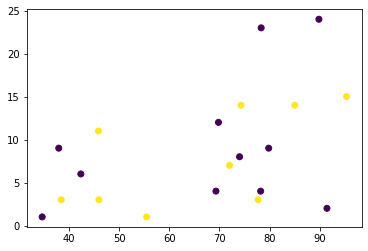

In [24]:
plt.scatter(x=df_train_2['площадь'], y=df_train_2['этаж'], c=df_train['кондиционер'])
plt.show()

Введем информацию по искомой точке

In [25]:
new_apartment = np.array([2, 51.0, 8.2, 35.9, 5, 5])

Уменьшим количество ее признаков до 2-х, выбранных ранее

In [26]:
new_apartment_2 = new_apartment[[1, 4]]

Отметим ее на картинке

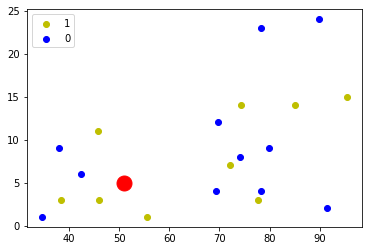

In [27]:
df_train_2_true = df_train_2[df_train_2['кондиционер'] == 1]
df_train_2_false = df_train_2[df_train_2['кондиционер'] == 0]

plt.scatter(x=df_train_2_true['площадь'], y=df_train_2_true['этаж'], c='y')
plt.scatter(x=df_train_2_false['площадь'], y=df_train_2_false['этаж'], c='b')
plt.legend(['1', '0'])
plt.plot(new_apartment_2[0],new_apartment_2[1],'ro', markersize=15)
plt.show()

По картинке видно, что ближайшая к ней точка желтая (для случая одного ближайшего соседа) - значит целевой признак у входной точки тоже 1.

В случае рассмотрения k ближайших соседей будем брать моду (наиболее часто встречающееся значение) целевой переменной.

Теперь рассмотрим математику данного процесса. В нашем случае будем считать евклидово расстояние от нашей искомой точки (красной) до всех остальных в обучающем датасете.

Назовем наши признаки как $x_{1i}$ и $x_{2i}$, а признаки искомой точки $x_{1find}$ и $x_{2find}$ соответственно, тогда

$$ dist = \sqrt{(x_{1find} - x_{1i})^2 + (x_{2find} - x_{2i})^2}$$

Реализуем формулу по расчету расстояния

In [8]:
def count_2_pr(df_train_2, new_apartment_2):
    dist = []
    for i in df_train_2.values:
        dist.append((i[0] - new_apartment_2[0])**2 + (i[1] - new_apartment_2[1])**2)
    return np.array(dist)

In [9]:
dist = count_2_pr(df_train_2, new_apartment_2)
dist

array([ 160.25,  185.  ,  281.69,   62.01,   74.96,   29.  ,  716.89,
        402.44,  740.84,   36.25,  623.89, 1069.29,  538.  , 1641.16,
       1237.  ,  845.44,  445.  , 2062.49,  335.89, 1866.44])

Далее находим индекс минимального элемента массива (для случая одного ближайшего соседа)

In [10]:
index_find = dist.argmin()
index_find

5

И находим значение целевого признака по индексу ближайшего соседа

In [11]:
df_train_2.loc[5, 'кондиционер']

1

Для случая k ближайших соседей добавим к массиву dist индексы и значение целевой переменной

In [12]:
dist_df = pd.DataFrame(dist, index=df_train_2.index)
dist_df['кондиционер'] = df_train_2['кондиционер']
dist_df.columns = ['dist', 'кондиционер']
dist_df.head()

,dist,кондиционер
0,160.25,1
1,185.00,0
2,281.69,0
3,62.01,1
4,74.96,0


Отсортируем

In [13]:
dist_df_sorted = dist_df.sort_values('dist').reset_index()

Сделаем выборку k значений

In [14]:
k = 5
dist_df_sorted_sample = dist_df_sorted.loc[0:k-1]
dist_df_sorted_sample

,index,dist,кондиционер
0,5,29.00,1
1,9,36.25,1
2,3,62.01,1
3,4,74.96,0
4,0,160.25,1


Возьмем моду целевой переменной

In [15]:
import statistics
statistics.mode(dist_df_sorted_sample['кондиционер'])

1

Собственно для 5 ближайших соседей значение целевого признака тоже 1 (можно проверить по картинку).

Но визуализировать мы может максимум 3 признака (тогда будем иметь 3-х мерное пространство), при большем количестве признаков мы попадаем в n-мерное пространство, которое можно представить только математически, однако там также считается расстояние как корень из суммы квадратов по каждому признаку. Если мы имеем p признаков тогда

$$ dist = \sqrt{(x_{0_find} - x_{0_i})^2 + (x_{1_find} - x_{1_i})^2 + ...+ (x_{p_find} - x_{p_i})^2}$$

Или в общем случае

$$ dist = \sqrt{\sum_0^p{(x_{p_find} - x_{p_i})^2}}$$

Тогда для нашего случая с кондиционерами вычислить расстояние можно следующим образом

In [16]:
def count_dist(df_train, new_apartment):
    dist = []
    #итерации по строкам датафрейма
    for i in df_train.values:
        dist_for_column = []
        #итерации по столбцам каждой строки
        for column_i in range(len(i)):
            dist_for_column.append((new_apartment[column_i] - i[column_i])**2)
        dist.append(np.sqrt(sum(dist_for_column)))
    return dist

In [17]:
dist = count_dist(df_train.drop(['кондиционер'], axis=1), new_apartment)
dist

[21.258880497335696,
 24.677520134729907,
 23.713076561256234,
 27.092065259038485,
 20.40098036859994,
 17.89301539707603,
 29.957469853110094,
 27.479082954130764,
 29.825660093282092,
 21.819715855161817,
 28.83782238658113,
 38.1443311646698,
 28.698780461894195,
 49.07158036990454,
 42.65208084021224,
 30.874099177141993,
 21.63238313270177,
 51.36818081263925,
 19.092930628900316,
 52.66621307821553]

Для вычисления данной длины у нас есть стандартная функция distance.euclidean(), тогда можно реализовать функцию в одни цикл

In [18]:
from scipy.spatial import distance

def count_dist_euclidian(df_train, new_apartment):
    dist = []
    for i in df_train.index:
        dist.append(distance.euclidean(new_apartment, df_train.loc[i]))
    return dist

In [19]:
dist = count_dist_euclidian(df_train.drop(['кондиционер'], axis=1), new_apartment)
dist

[21.258880497335696,
 24.677520134729907,
 23.713076561256237,
 27.092065259038485,
 20.40098036859994,
 17.89301539707603,
 29.957469853110094,
 27.479082954130764,
 29.825660093282096,
 21.819715855161817,
 28.83782238658113,
 38.1443311646698,
 28.698780461894195,
 49.07158036990454,
 42.65208084021224,
 30.874099177141993,
 21.63238313270177,
 51.36818081263925,
 19.09293062890032,
 52.66621307821553]

Дальше идентично с тем, что делали раньше.